In [370]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 8

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

from sbcustom import rangeplot, boxplot
from scipy.optimize import minimize
from statsmodels.formula.api import ols
from patsy import dmatrices # design matrix
from numpy import *
from statsmodels.tools.eval_measures import rmse, meanabs
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [371]:
data = pd.read_csv("/Users/kimjungwon/Desktop/school/DataAnalyze/Data/data.csv")

# World Happiness Report
---
* 세계 행복지수와 관련된 데이터셋이며 이에 대한 정보를 분석하고 모델링 해보고자 합니다.
* GDP, 사회적 지원, 건강, 자유도, 관대함, 신뢰 정부 부패라는 Column으로 구성되어 있고 어떤 요소가 행복 순위에 영향을 미치는지 분석해보고자 합니다
    - 저는 경제적인 부분을 나타내는 GDP와 개인의 자유도, 사회적 지원이 행복 지수에 큰 영향을 끼칠 것이라고 생각하여 3가지 부분에 대해 분석하고 결과를 살펴보고자 합니다.

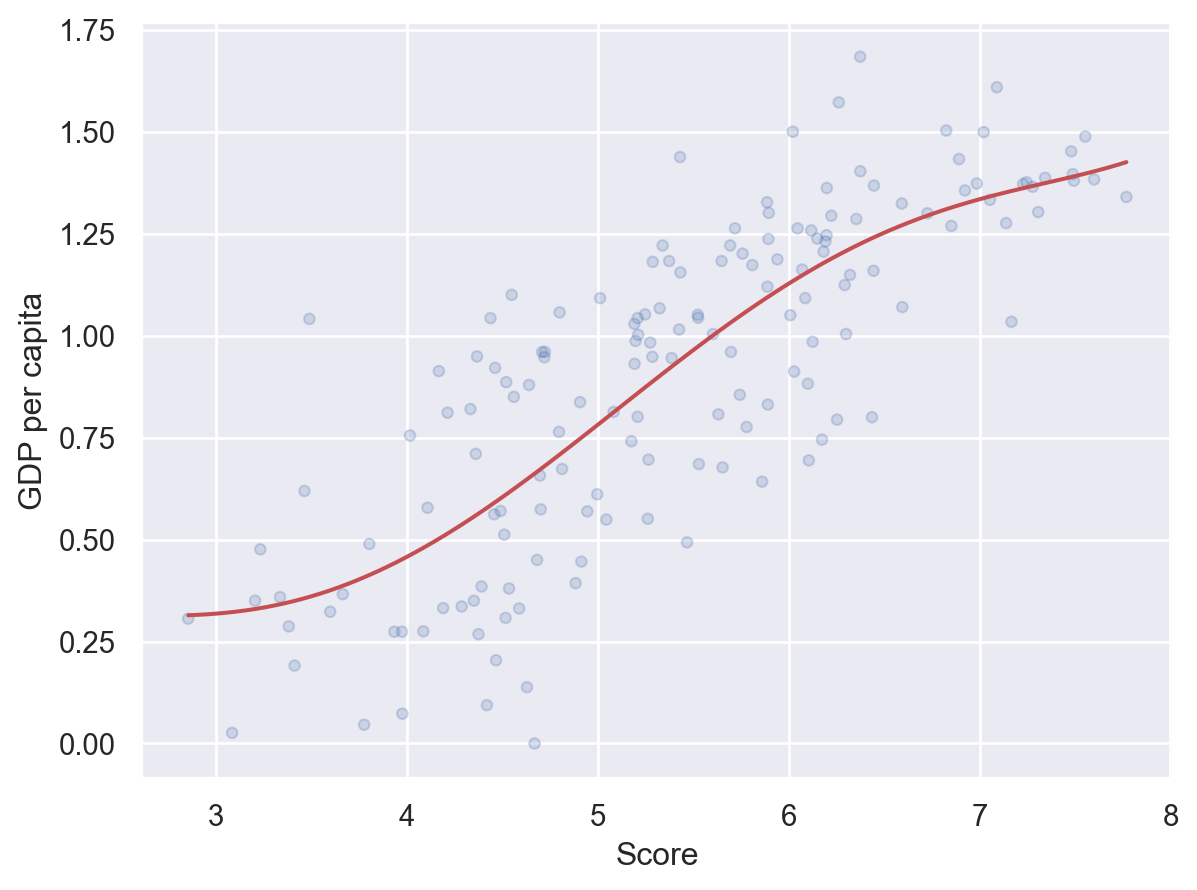

In [372]:
(
    so.Plot(data, x='Score', y='GDP per capita')
    .add(so.Dots(alpha=.25))
    .add(so.Line(color='r'), so.PolyFit(5))
)

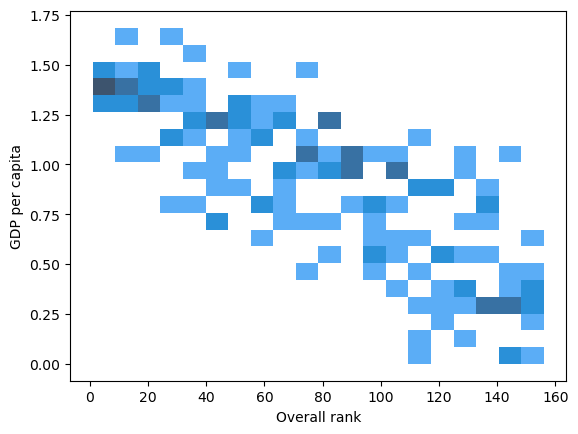

In [373]:
sns.histplot(data, y="GDP per capita", x="Overall rank", bins=20)
plt.show()

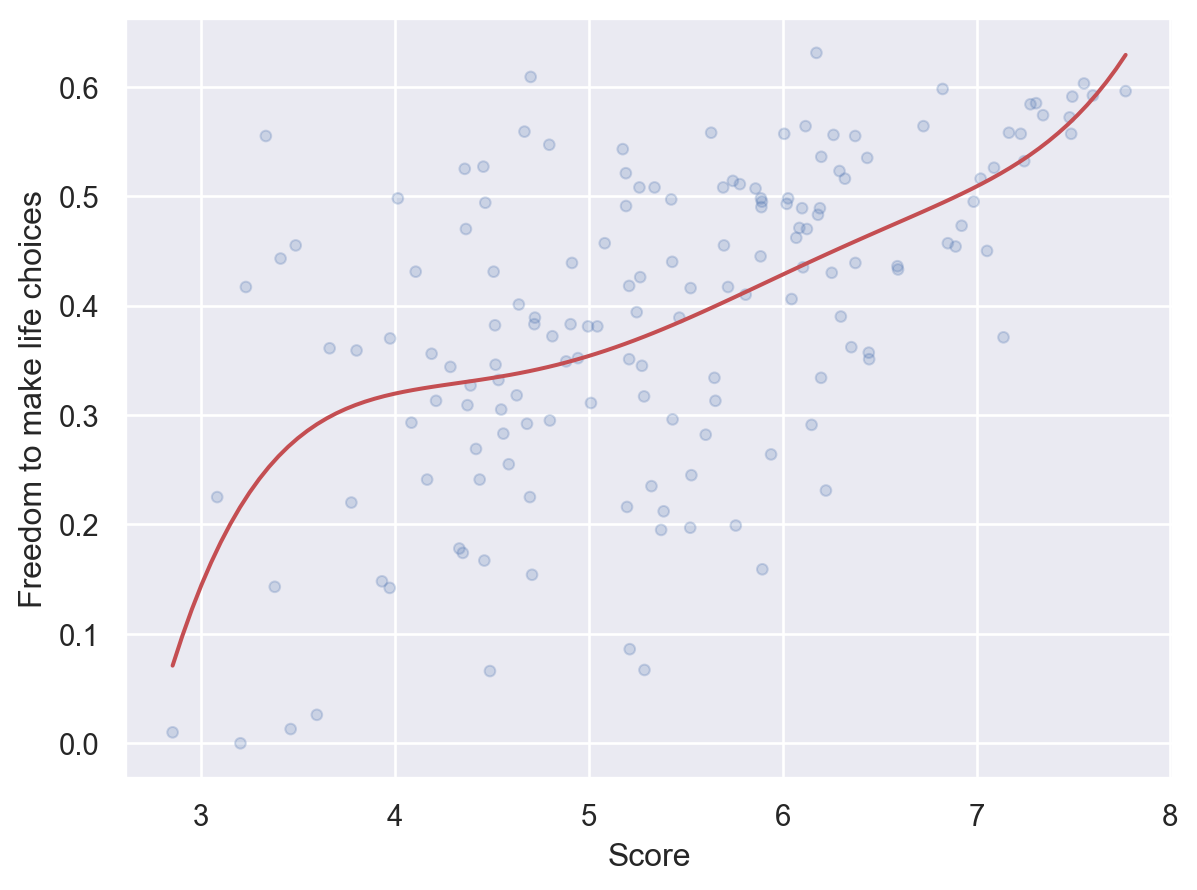

In [374]:
(
    so.Plot(data, x='Score', y='Freedom to make life choices')
    .add(so.Dots(alpha=.25))
    .add(so.Line(color='r'), so.PolyFit(5))
)

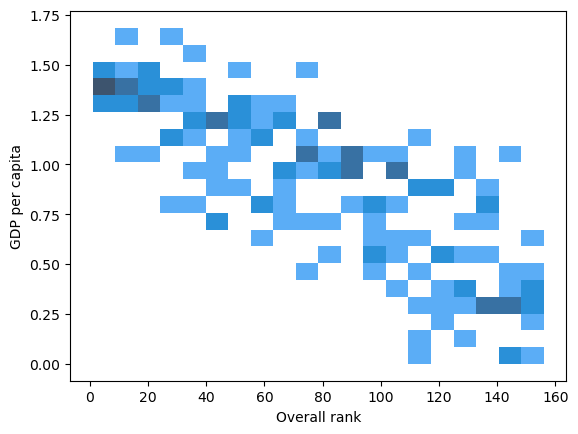

In [375]:
sns.histplot(data, y="GDP per capita", x="Overall rank", bins=20)
plt.show()

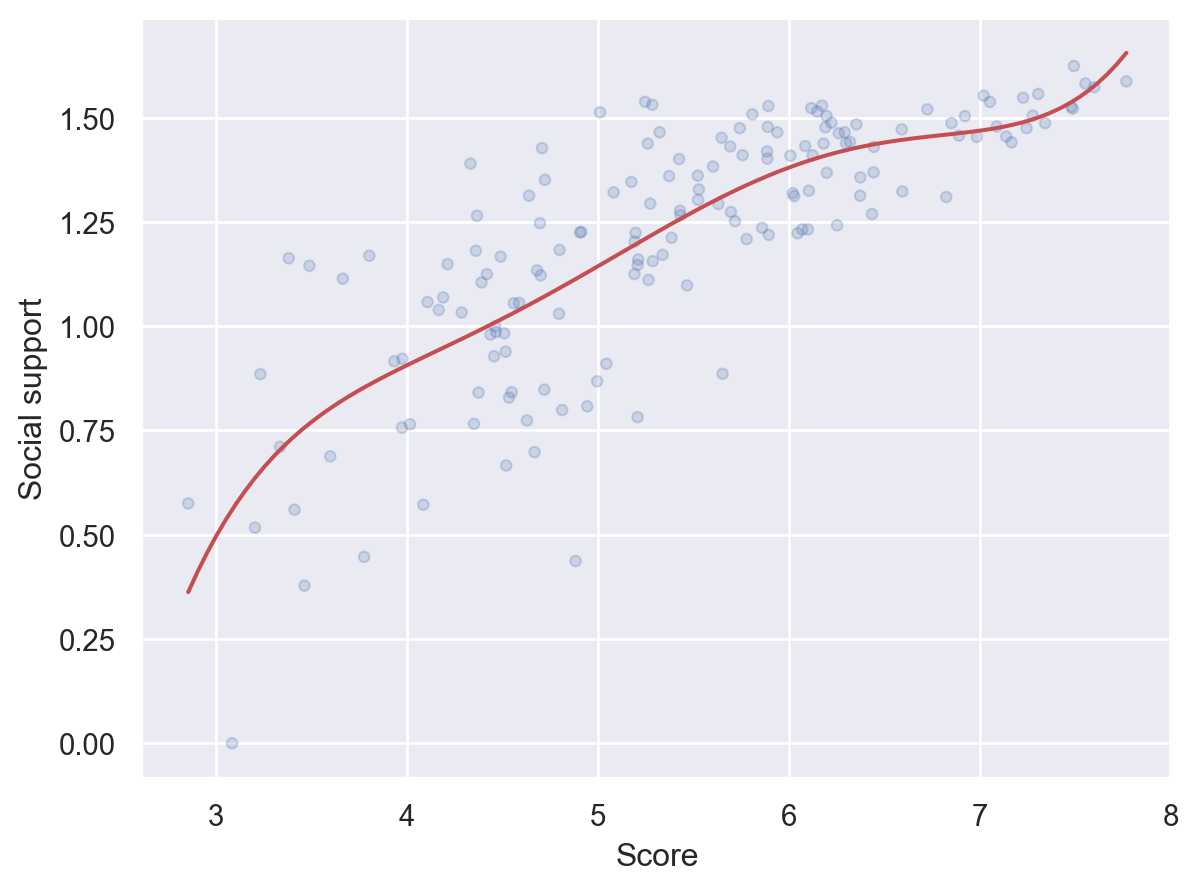

In [376]:
(
    so.Plot(data, x='Score', y='Social support')
    .add(so.Dots(alpha=.25))
    .add(so.Line(color='r'), so.PolyFit(5))
)

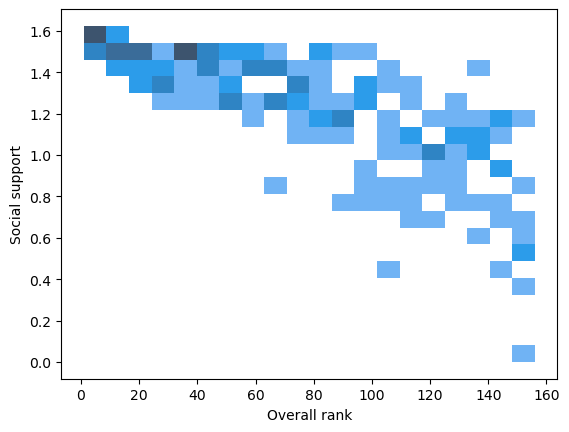

In [377]:
sns.histplot(data, y="Social support", x="Overall rank", bins=20)
plt.show()

&rarr; 3가지 정보 모두 행복 순위에 직접적인 영향을 끼친다고 생각하는 결과이다. 순위가 높을 수록 해당하는 정보의 값 또한 높다

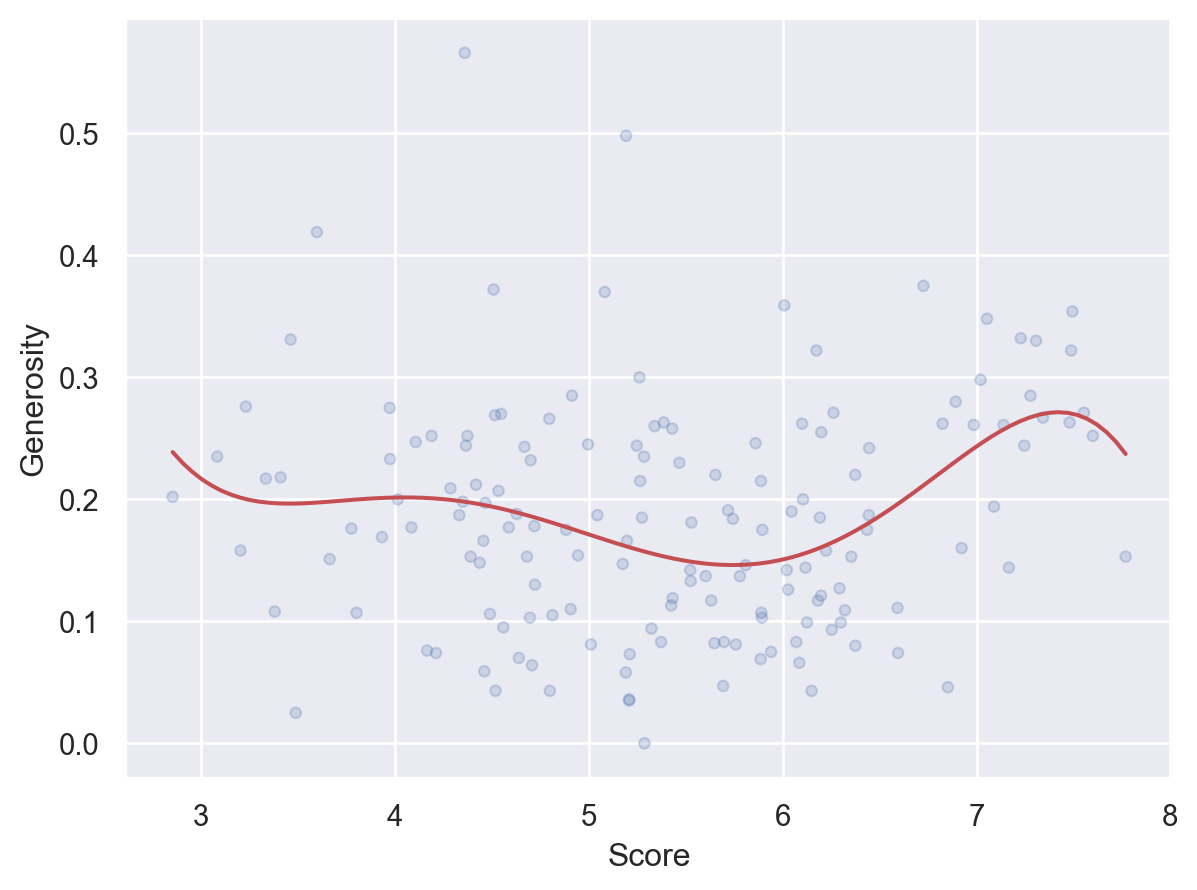

In [378]:
(
    so.Plot(data, x='Score', y='Generosity')
    .add(so.Dots(alpha=.25))
    .add(so.Line(color='r'), so.PolyFit(5))
)

&rarr; 사회적 관대함이라는 것은 행복 지수 점수에 큰 영향을 끼치는 것 같지는 않다

In [379]:
data_cat = data.assign(
    gdp_cat = lambda x: pd.cut(x['GDP per capita'], 10, labels=False),
    freedom_cat = lambda x: pd.cut(x['Freedom to make life choices'], 10, labels=False),
    support_cat = lambda x: pd.cut(x['Social support'], 10, labels=False)
)
data_cat

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gdp_cat,freedom_cat,support_cat
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39,7,9,9
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41,8,9,9
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34,8,9,9
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.23,0.48,0.89,0.50,0.42,0.28,0.15,2,6,5
153,154,Afghanistan,3.20,0.35,0.52,0.36,0.00,0.16,0.03,2,0,3
154,155,Central African Republic,3.08,0.03,0.00,0.10,0.23,0.23,0.04,0,3,0
155,156,South Sudan,2.85,0.31,0.57,0.29,0.01,0.20,0.09,1,0,3


<Axes: title={'center': 'Score'}, xlabel='gdp_cat'>

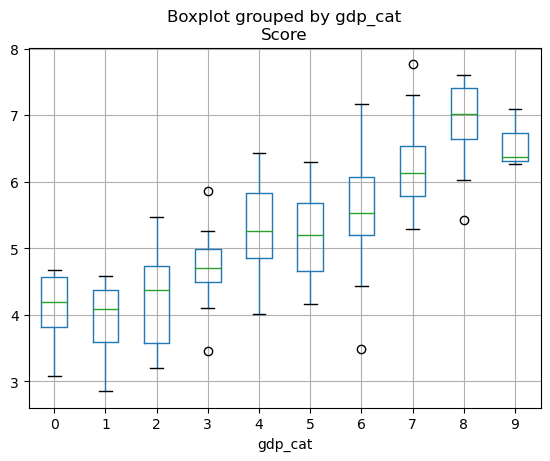

In [380]:
data_cat.boxplot('Score', by='gdp_cat')

<Axes: title={'center': 'Score'}, xlabel='freedom_cat'>

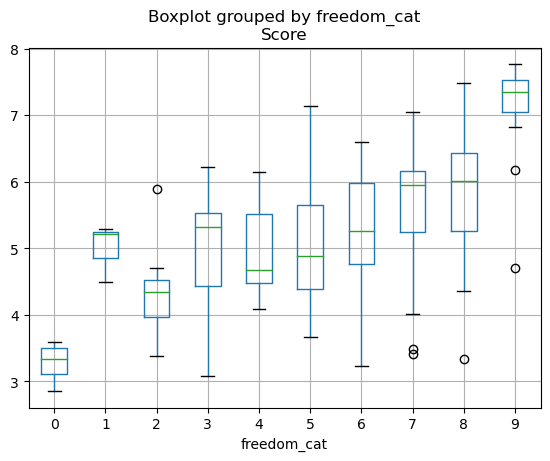

In [381]:
data_cat.boxplot('Score', by='freedom_cat')

<Axes: title={'center': 'Score'}, xlabel='support_cat'>

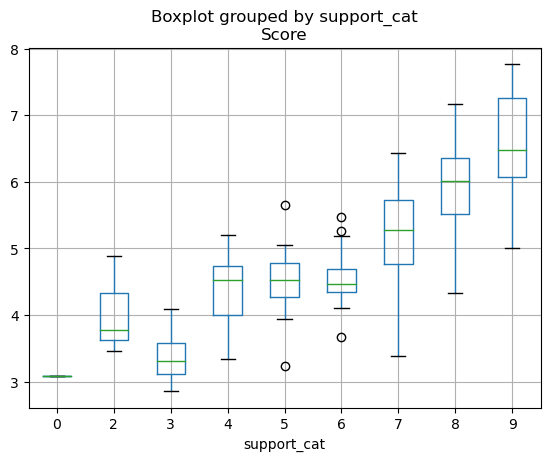

In [382]:
data_cat.boxplot('Score', by='support_cat')

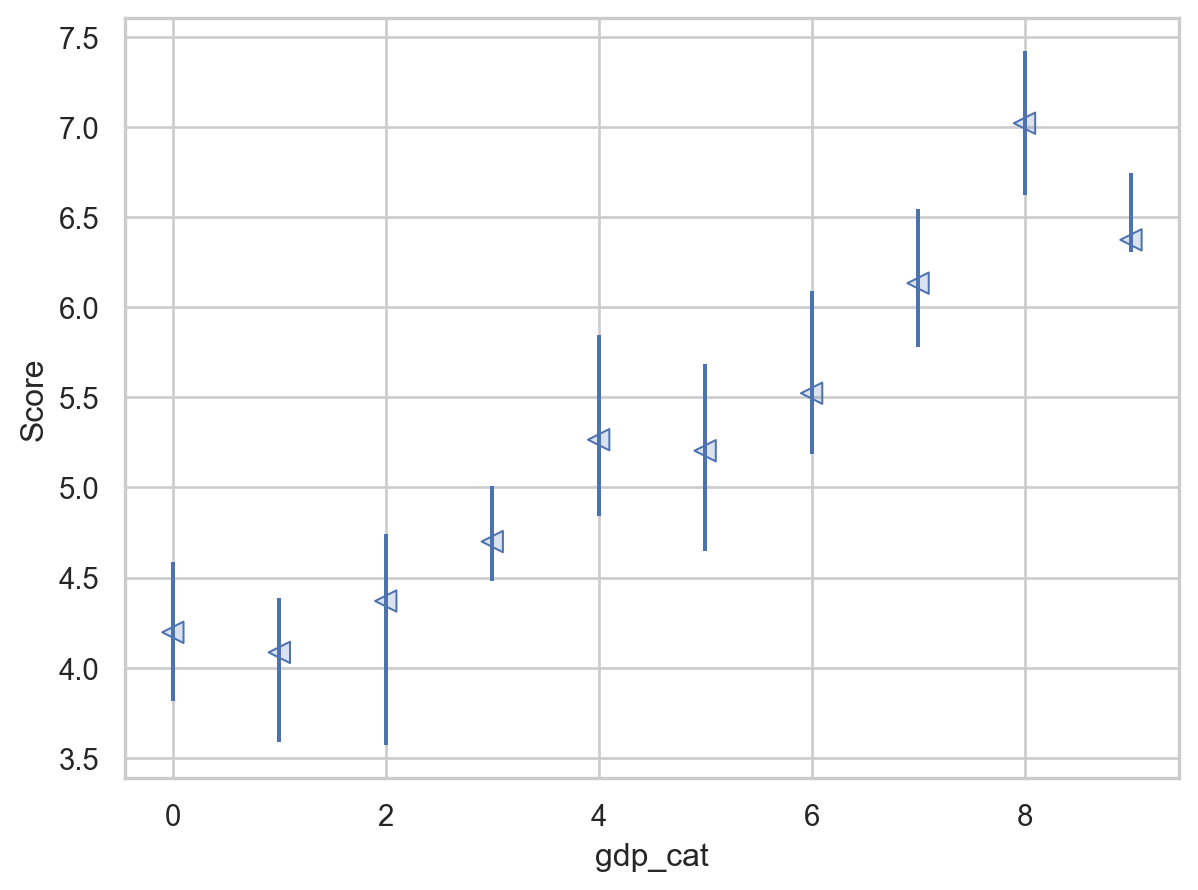

In [383]:
rangeplot(data_cat, x='gdp_cat', y='Score')

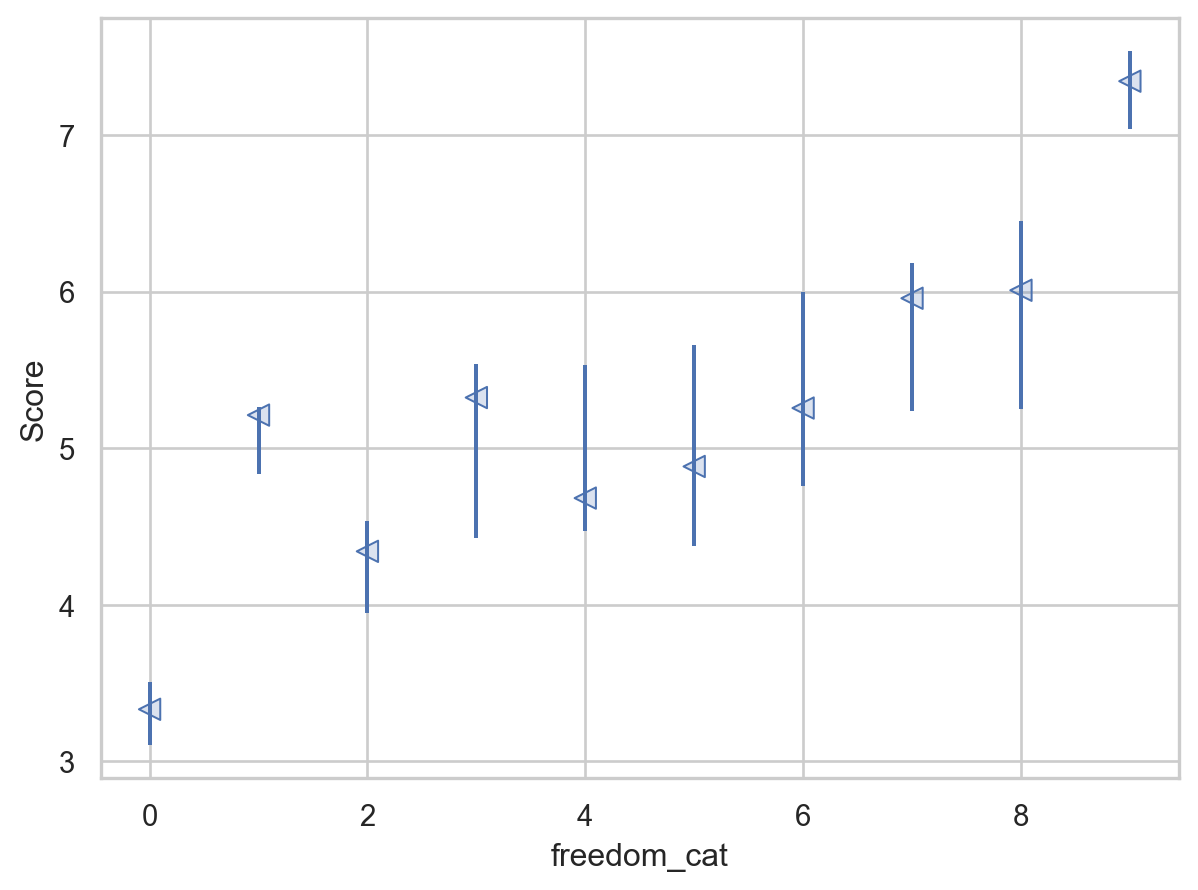

In [384]:
rangeplot(data_cat, x='freedom_cat', y='Score')

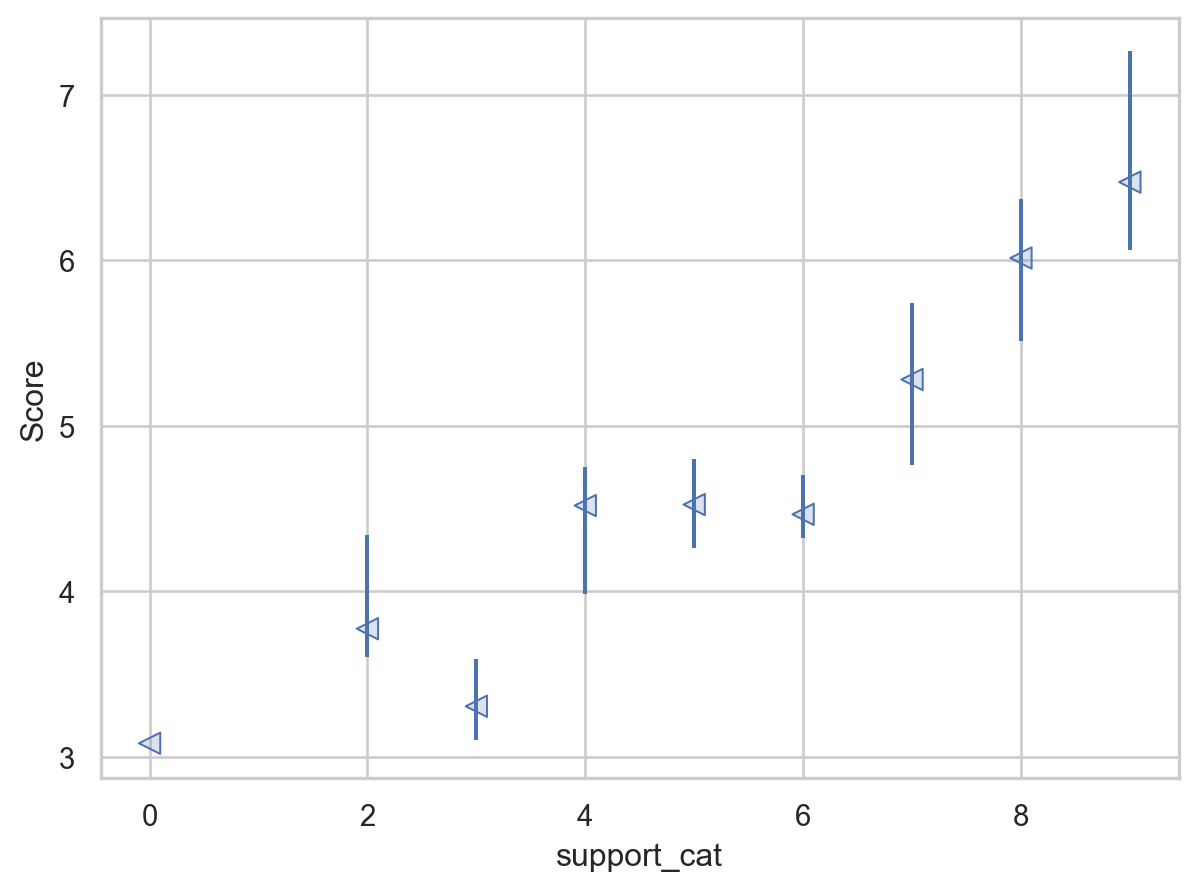

In [385]:
rangeplot(data_cat, x='support_cat', y='Score')

<Axes: xlabel='gdp_cat', ylabel='Score'>

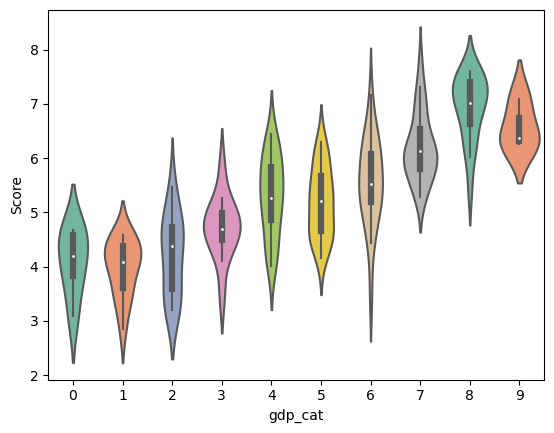

In [386]:
# Violin plot
sns.violinplot(data_cat, x="gdp_cat", y="Score", palette="Set2")

<Axes: xlabel='freedom_cat', ylabel='Score'>

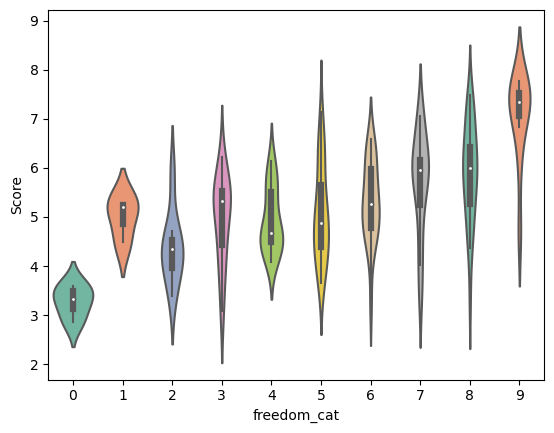

In [387]:
sns.violinplot(data_cat, x="freedom_cat", y="Score", palette="Set2")

<Axes: xlabel='support_cat', ylabel='Score'>

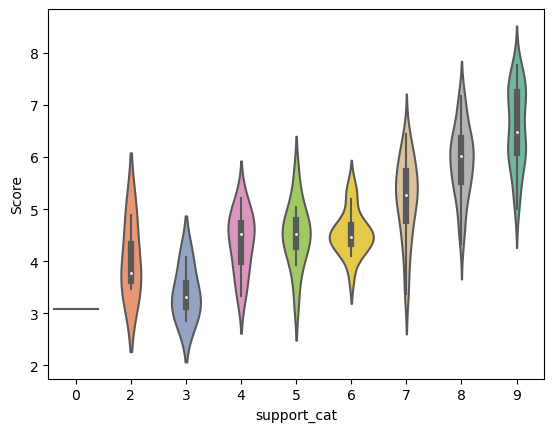

In [388]:
sns.violinplot(data_cat, x="support_cat", y="Score", palette="Set2")

&rarr; 3가지 정보가 높아야 전체 점수가 행복 랭킹이 높은 것에 수렴한다

In [389]:
data.rename(columns={'Overall rank' : "rank", 'GDP per capita':"GDP", "Social support" : "support", "Freedom to make life choices" : "freedom"}, inplace=True)

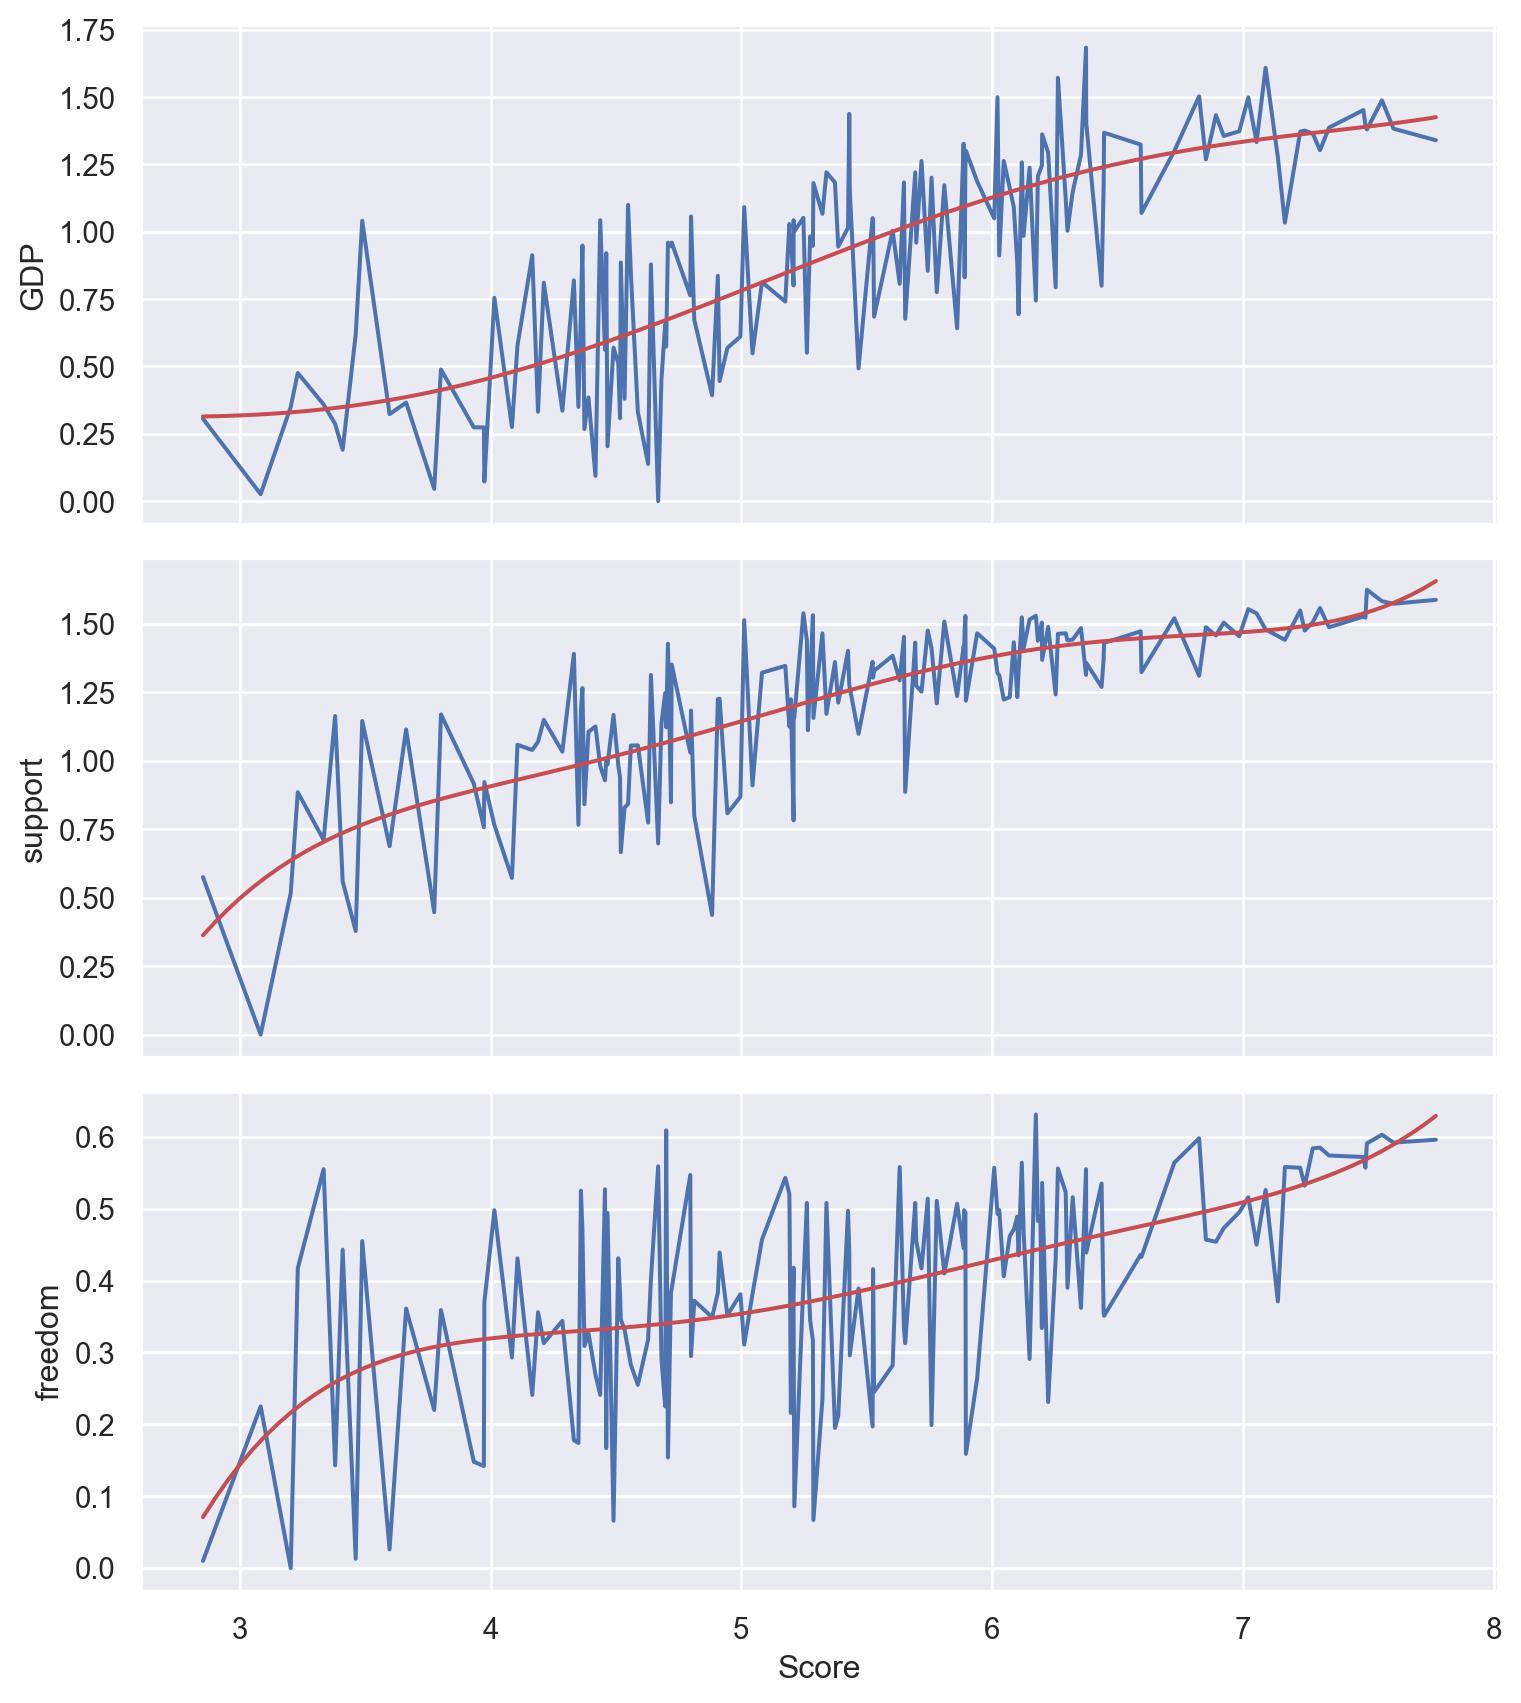

In [390]:
(
    so.Plot(data, x='Score')
    .pair(y=['GDP', 'support', 'freedom'])
    .add(so.Line())
    .add(so.Line(color='r'), so.PolyFit(5))
    .layout(size=(8, 9))
)

In [391]:
mod1 = ols('Score ~ GDP', data=data).fit()
mod2 = ols('Score ~ support', data=data).fit()
mod3 = ols('Score ~ freedom', data=data).fit()

mod4 = ols('Score ~ GDP + support', data=data).fit()
mod5 = ols('Score ~ freedom + support', data=data).fit()
mod6 = ols('Score ~ GDP + support + freedom', data=data).fit()
mod7 = ols('Score ~ GDP * support * freedom', data=data).fit()


In [392]:
mods = [mod1, mod2, mod3, mod4, mod5, mod6, mod7]

print("The prediction accuracy of the models (original unit except R-squared):\n")

index = 1
for mod in mods:
    R2 = mod.rsquared
    
    print(f"{index} Model R-squared: {R2:.2f}")
    index += 1

The prediction accuracy of the models (original unit except R-squared):

1 Model R-squared: 0.63
2 Model R-squared: 0.60
3 Model R-squared: 0.32
4 Model R-squared: 0.70
5 Model R-squared: 0.66
6 Model R-squared: 0.75
7 Model R-squared: 0.80


### 모델 결과로 본 학습률 결과
---
단일 모델 꼴의 모델에서는 GDP가 가장 squared값이 높고 freedom은 0.3 수준에 불과하는 결과를 확인할 수 있었다. </br>
interaction 모델로 설정할 경우에는 근소한 차이지만 freedom도 할 경우가 가장 좋은 것을 확인할 수 있었다.

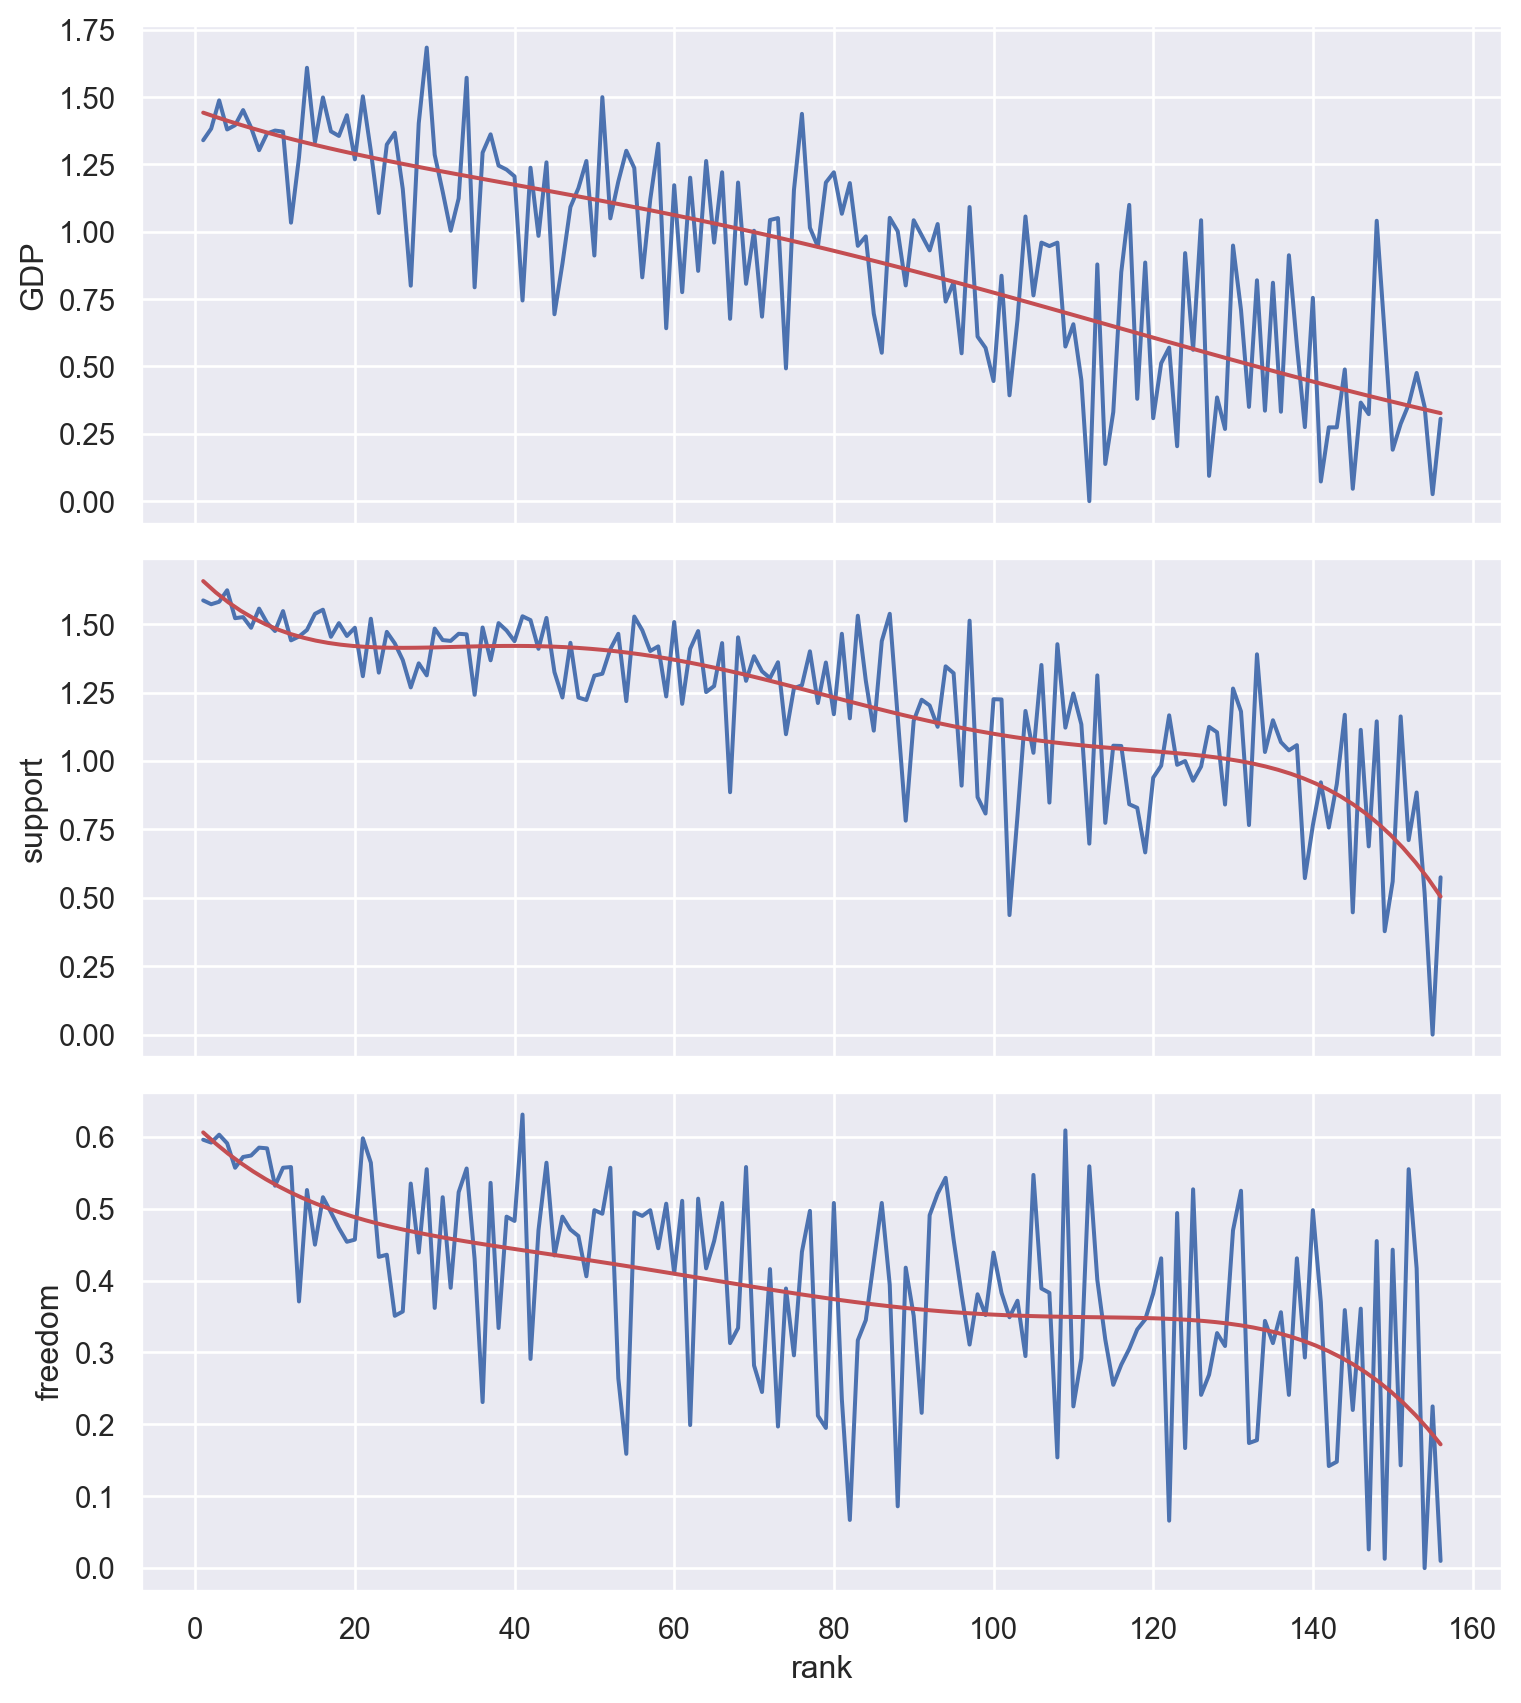

In [393]:
(
    so.Plot(data, x='rank')
    .pair(y=['GDP', 'support', 'freedom'])
    .add(so.Line())
    .add(so.Line(color='r'), so.PolyFit(5))
    .layout(size=(8, 9))
)

In [394]:
gdp_m = np.linspace(data["GDP"].min(), data["GDP"].max(), 10)
support_m = np.linspace(data["support"].min(), data["support"].max(), 10)
freedom_m = np.linspace(data["freedom"].min(), data["freedom"].max(), 10)

## 단일 모델로 먼저 살펴본다

In [395]:
grid_t = pd.DataFrame(
    {"GDP" : gdp_m, "support" : support_m, "freedom" : freedom_m}
)
grid_t
grid_t['pred1'] = mod1.predict(grid_t)
grid_t['pred2'] = mod4.predict(grid_t)
grid_t['pred3'] = mod6.predict(grid_t)
grid_t

,GDP,support,freedom,pred1,pred2,pred3
0,0.00,0.00,0.00,3.40,2.33,2.05
1,0.19,0.18,0.07,3.81,2.86,2.64
2,0.37,0.36,0.14,4.23,3.39,3.23
3,0.56,0.54,0.21,4.64,3.92,3.82
...,...,...,...,...,...,...
6,1.12,1.08,0.42,5.89,5.51,5.59
7,1.31,1.26,0.49,6.30,6.04,6.18
8,1.50,1.44,0.56,6.72,6.56,6.77
9,1.68,1.62,0.63,7.13,7.09,7.36


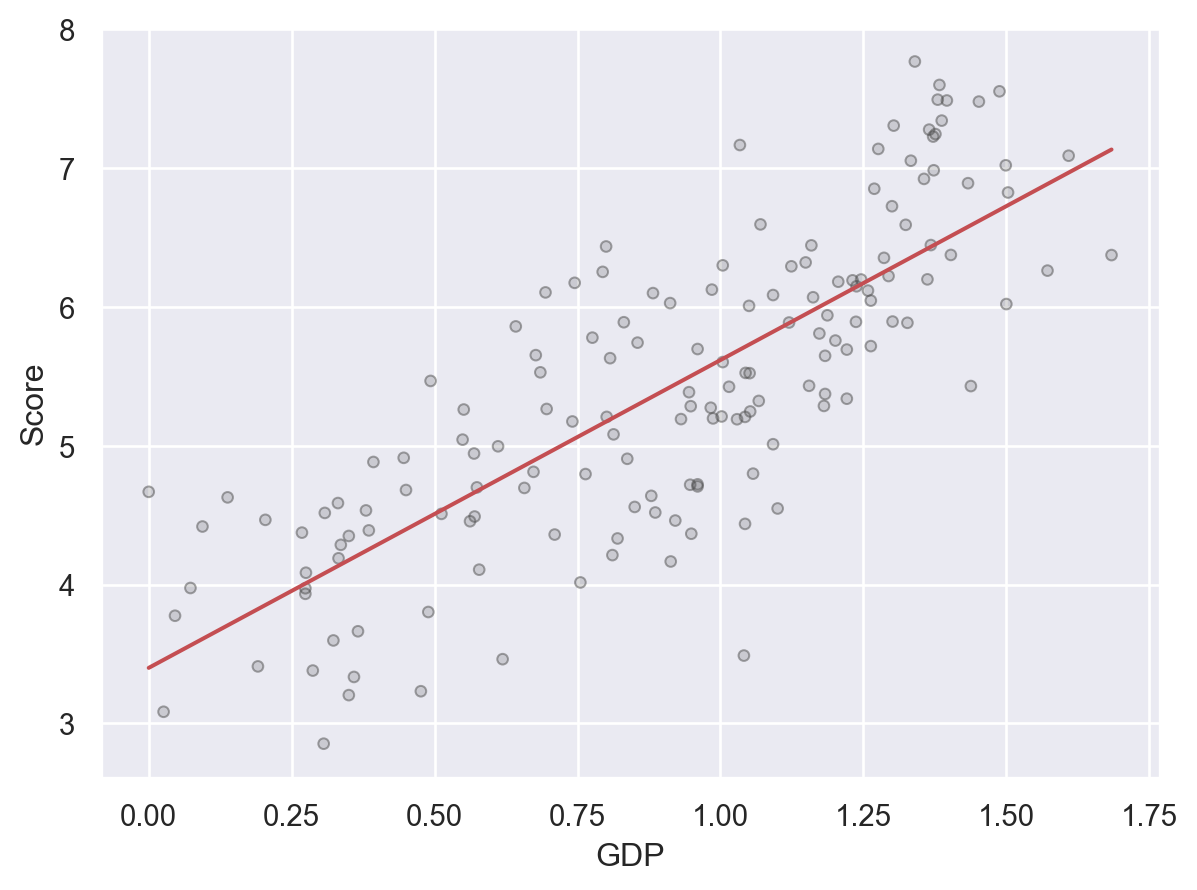

In [396]:
(
    so.Plot(data, x='GDP', y='Score')
    .add(so.Dots(color='.3', alpha=.5))
    .add(so.Line(color='r'), x=grid_t.GDP, y=grid_t.pred1)
)

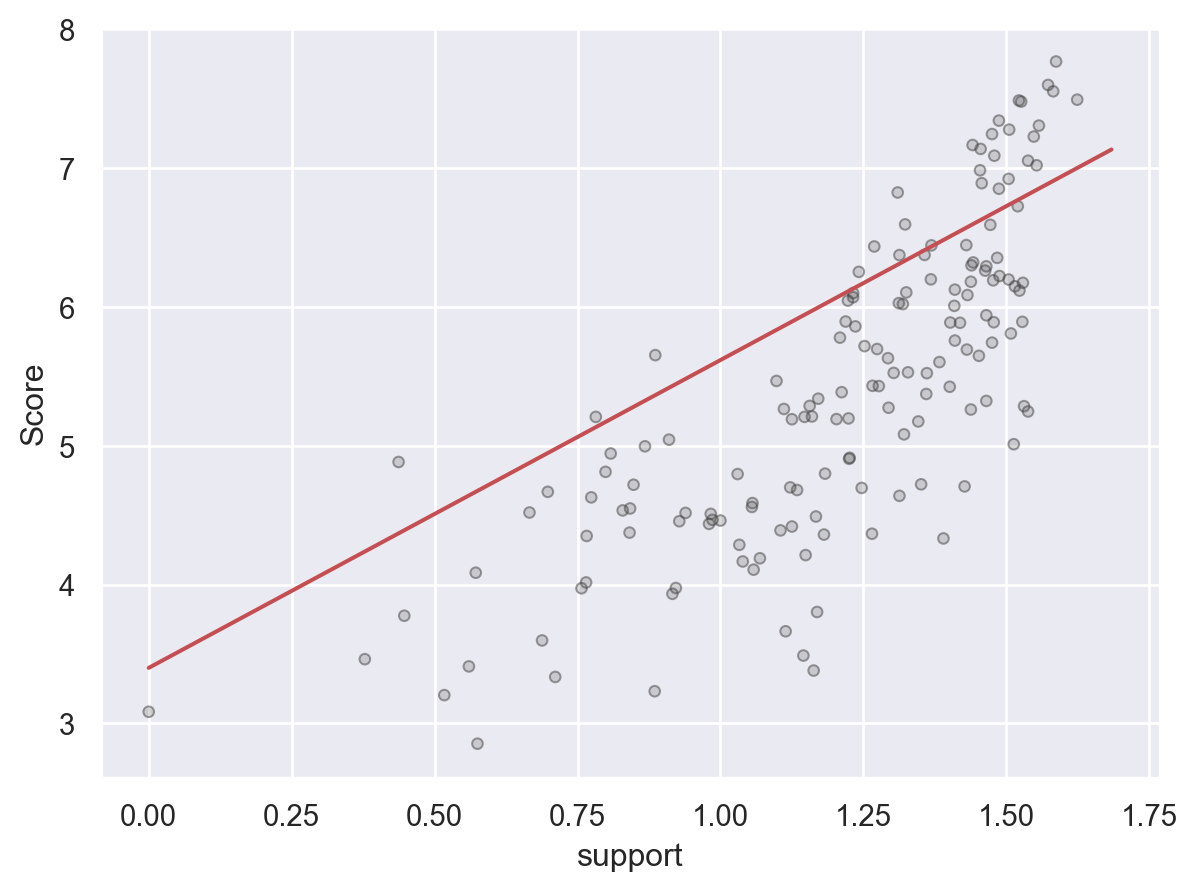

In [397]:
(
    so.Plot(data, x='support', y='Score')
    .add(so.Dots(color='.25', alpha=.5))
    .add(so.Line(color='r'), x=grid_t.GDP, y=grid_t.pred1)
)

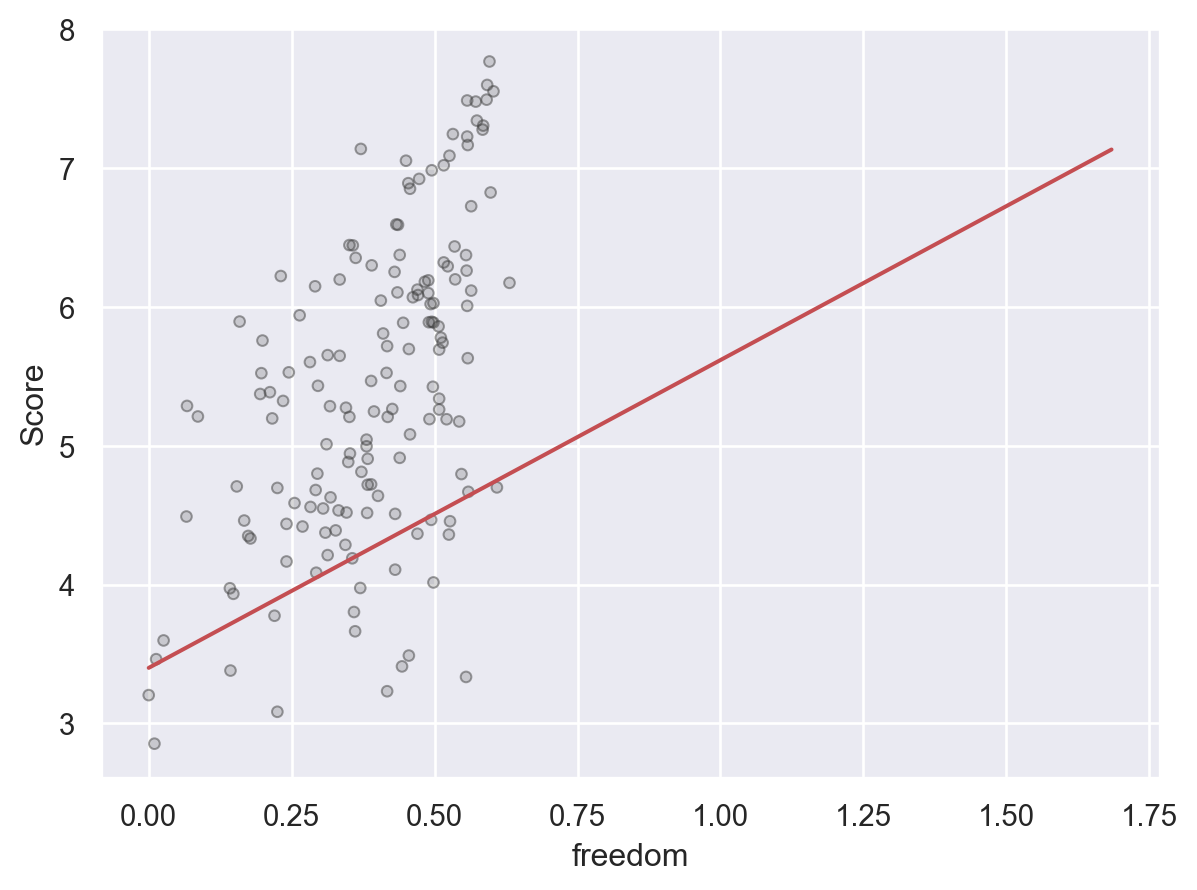

In [398]:
(
    so.Plot(data, x='freedom', y='Score')
    .add(so.Dots(color='.25', alpha=.5))
    .add(so.Line(color='r'), x=grid_t.GDP, y=grid_t.pred1)
)

&rarr; freedom의 결과를 보니 범위 자체가 일치하지 않는 것 같다

In [399]:
data['resid1'] = mod1.resid
data['resid2'] = mod2.resid
data['resid3'] = mod3.resid

data

,rank,Country or region,Score,GDP,support,Healthy life expectancy,freedom,Generosity,Perceptions of corruption,resid1,resid2,resid3
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39,1.40,1.27,1.47
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41,1.13,1.14,1.31
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34,0.85,1.07,1.22
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12,1.03,0.89,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.23,0.48,0.89,0.50,0.42,0.28,0.15,-1.22,-1.24,-2.28
153,154,Afghanistan,3.20,0.35,0.52,0.36,0.00,0.16,0.03,-0.97,-0.20,-0.48
154,155,Central African Republic,3.08,0.03,0.00,0.10,0.23,0.23,0.04,-0.37,1.17,-1.59
155,156,South Sudan,2.85,0.31,0.57,0.29,0.01,0.20,0.09,-1.23,-0.72,-0.87


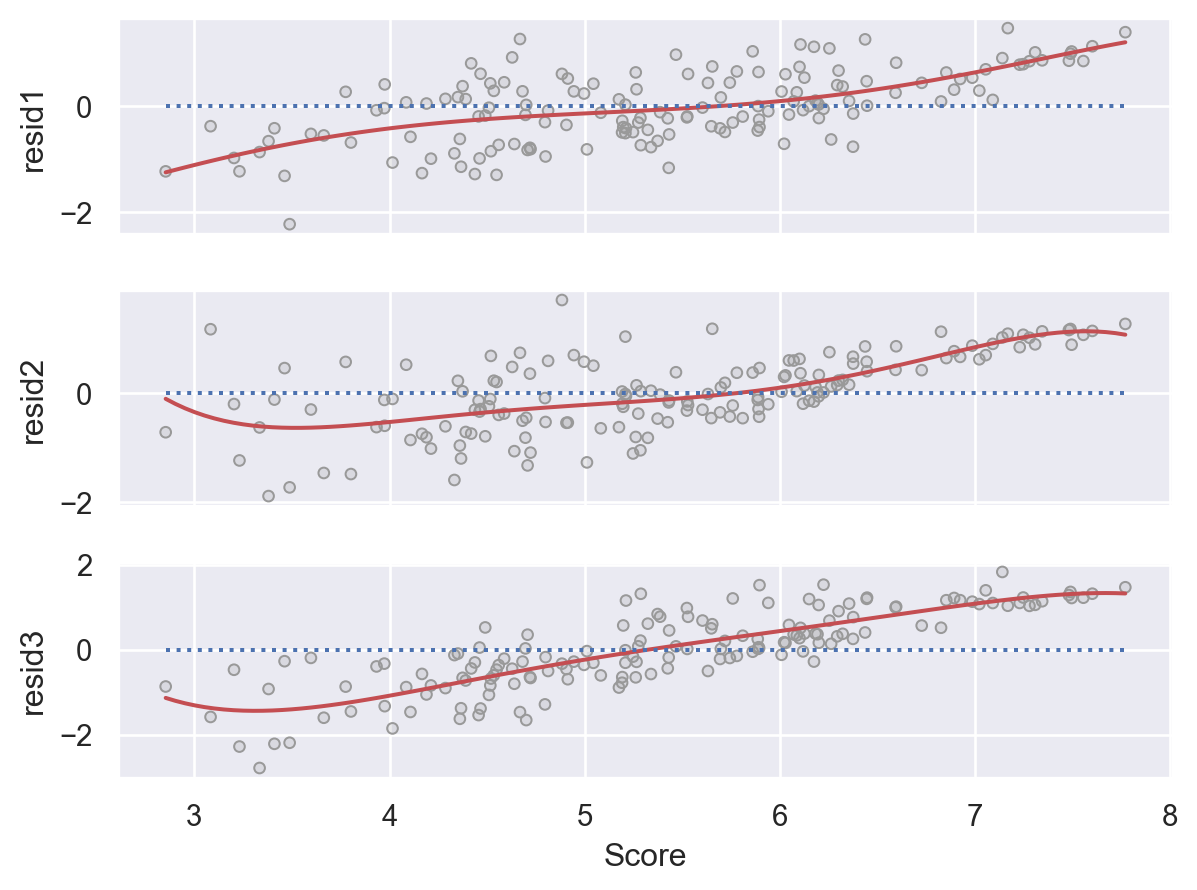

In [400]:
(
    so.Plot(data, x='Score')
    .pair(y=['resid1', 'resid2', 'resid3'])
    .add(so.Dots(color='.6'))
    .add(so.Line(color='r'), so.PolyFit(5))
    .add(so.Line(linestyle=':'), so.Agg(lambda x: 0))
)

In [401]:
data_temp = data.copy()
data_temp


,rank,Country or region,Score,GDP,support,Healthy life expectancy,freedom,Generosity,Perceptions of corruption,resid1,resid2,resid3
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39,1.40,1.27,1.47
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41,1.13,1.14,1.31
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34,0.85,1.07,1.22
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12,1.03,0.89,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.23,0.48,0.89,0.50,0.42,0.28,0.15,-1.22,-1.24,-2.28
153,154,Afghanistan,3.20,0.35,0.52,0.36,0.00,0.16,0.03,-0.97,-0.20,-0.48
154,155,Central African Republic,3.08,0.03,0.00,0.10,0.23,0.23,0.04,-0.37,1.17,-1.59
155,156,South Sudan,2.85,0.31,0.57,0.29,0.01,0.20,0.09,-1.23,-0.72,-0.87


In [402]:
data_mods1 = data_temp.melt(
    id_vars = ['Score','GDP', 'support', 'freedom'],
    value_vars = ['resid1', 'resid2', 'resid3'],
    var_name = 'model',
    value_name = 'resid',
)

In [403]:
data_mods1

,Score,GDP,support,freedom,model,resid
0,7.77,1.34,1.59,0.60,resid1,1.40
1,7.60,1.38,1.57,0.59,resid1,1.13
2,7.55,1.49,1.58,0.60,resid1,0.85
3,7.49,1.38,1.62,0.59,resid1,1.03
...,...,...,...,...,...,...
464,3.23,0.48,0.89,0.42,resid3,-2.28
465,3.20,0.35,0.52,0.00,resid3,-0.48
466,3.08,0.03,0.00,0.23,resid3,-1.59
467,2.85,0.31,0.57,0.01,resid3,-0.87


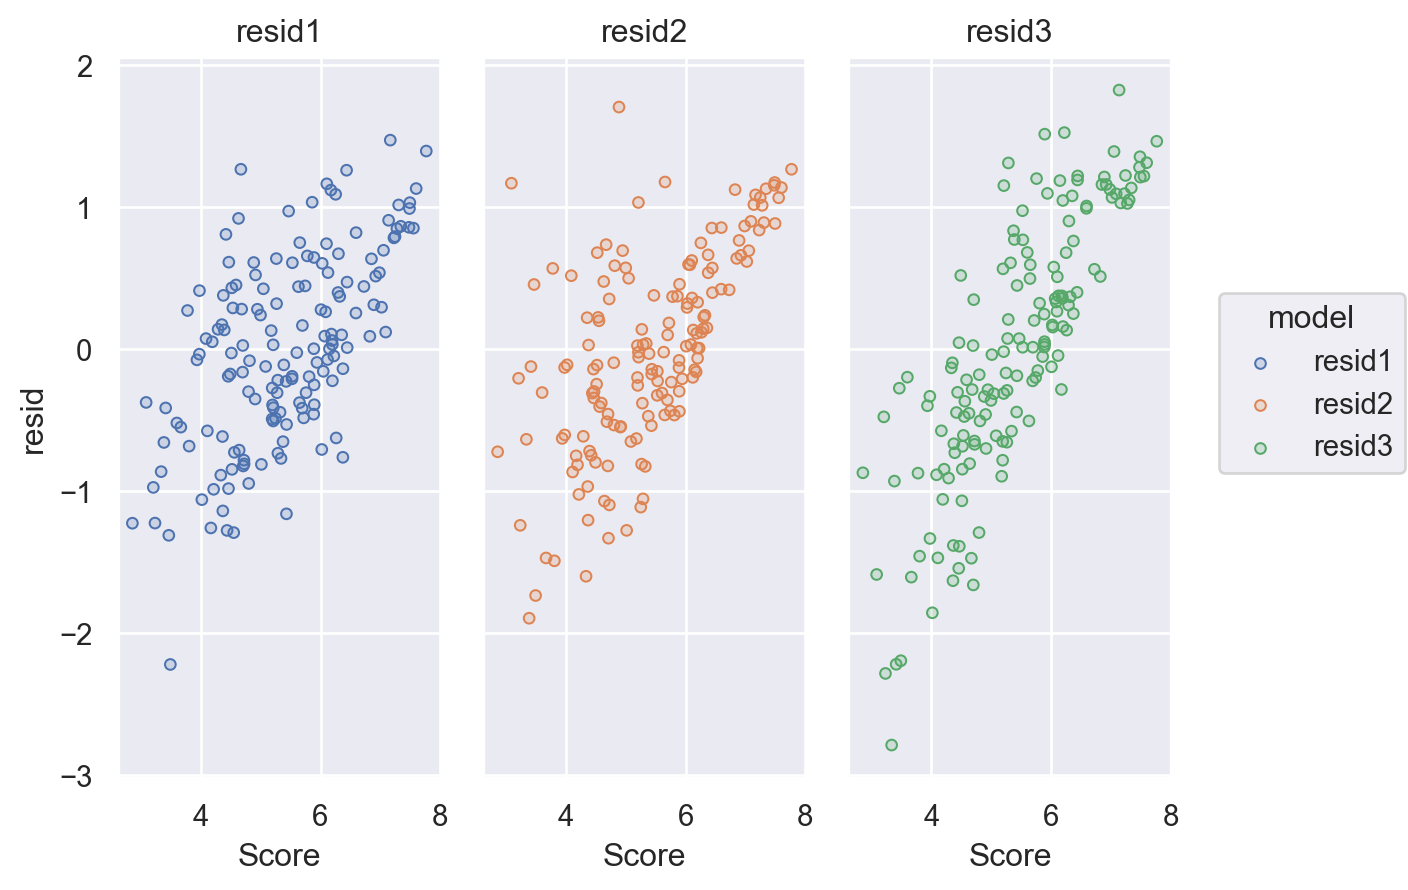

In [404]:
(
    so.Plot(data_mods1, x='Score', y='resid', color='model')
    .add(so.Dots())
    .facet('model')
)

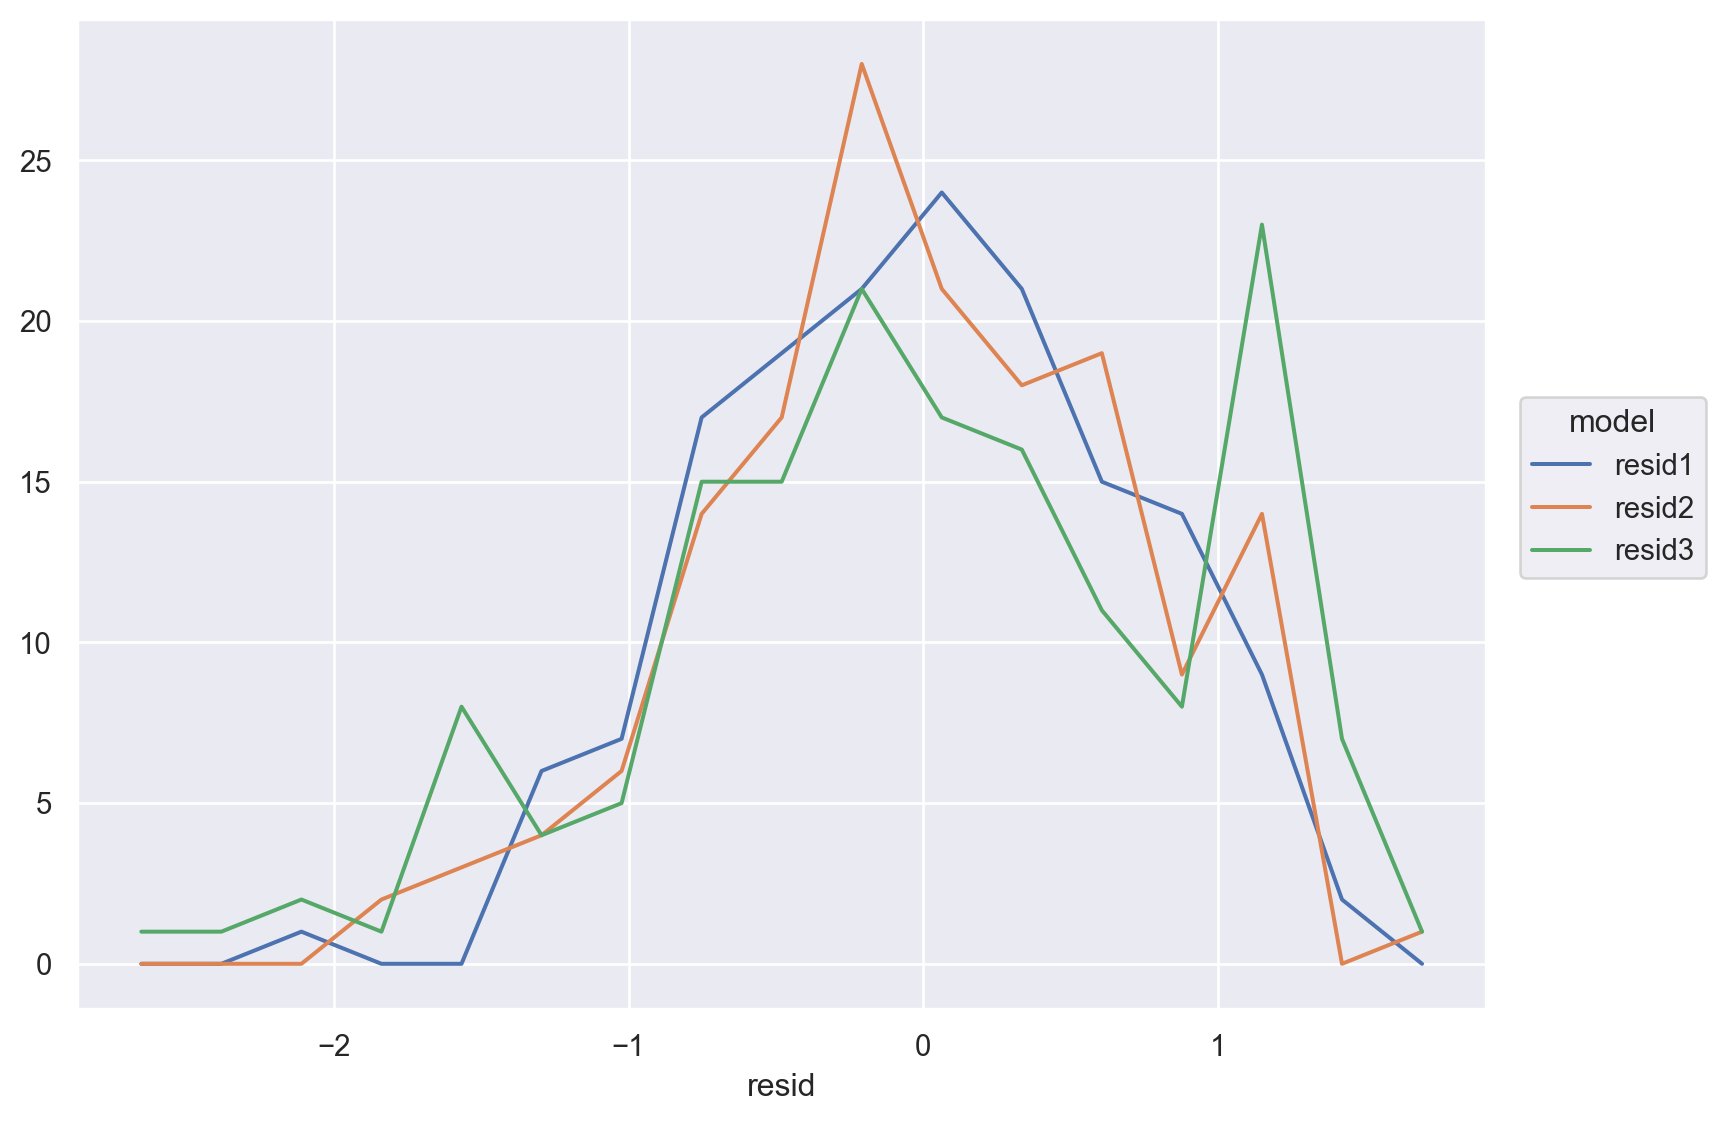

In [405]:
(
    so.Plot(data_mods1, x='resid', color='model')
    .add(so.Line(), so.Hist())
    .layout(size=(8, 6))
)

## Interaction 모델로 살펴본다

In [406]:
from itertools import product
grid = pd.DataFrame(
    list(product(gdp_m, support_m, freedom_m)),
    columns=["GDP", "support", "freedom"],
)
grid

,GDP,support,freedom
0,0.00,0.00,0.00
1,0.00,0.00,0.07
2,0.00,0.00,0.14
3,0.00,0.00,0.21
...,...,...,...
996,1.68,1.62,0.42
997,1.68,1.62,0.49
998,1.68,1.62,0.56
999,1.68,1.62,0.63


In [407]:
grid['pred1'] = mod6.predict(grid)
grid['pred2'] = mod7.predict(grid)
grid

,GDP,support,freedom,pred1,pred2
0,0.00,0.00,0.00,2.05,2.40
1,0.00,0.00,0.07,2.19,2.68
2,0.00,0.00,0.14,2.32,2.97
3,0.00,0.00,0.21,2.46,3.25
...,...,...,...,...,...
996,1.68,1.62,0.42,6.95,7.50
997,1.68,1.62,0.49,7.09,7.79
998,1.68,1.62,0.56,7.22,8.09
999,1.68,1.62,0.63,7.36,8.39


In [408]:
data_pred = data.assign(
    pred_m1 = mod1.fittedvalues,
    pred_m2 = mod2.fittedvalues,
    resid_m1 = mod1.resid,
    resid_m2 = mod2.resid
)
data_pred

,rank,Country or region,Score,GDP,support,Healthy life expectancy,freedom,Generosity,Perceptions of corruption,resid1,resid2,resid3,pred_m1,pred_m2,resid_m1,resid_m2
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39,1.40,1.27,1.47,6.37,6.50,1.40,1.27
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41,1.13,1.14,1.31,6.47,6.46,1.13,1.14
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34,0.85,1.07,1.22,6.70,6.49,0.85,1.07
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12,1.03,0.89,1.21,6.46,6.61,1.03,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,Tanzania,3.23,0.48,0.89,0.50,0.42,0.28,0.15,-1.22,-1.24,-2.28,4.46,4.47,-1.22,-1.24
153,154,Afghanistan,3.20,0.35,0.52,0.36,0.00,0.16,0.03,-0.97,-0.20,-0.48,4.18,3.41,-0.97,-0.20
154,155,Central African Republic,3.08,0.03,0.00,0.10,0.23,0.23,0.04,-0.37,1.17,-1.59,3.46,1.91,-0.37,1.17
155,156,South Sudan,2.85,0.31,0.57,0.29,0.01,0.20,0.09,-1.23,-0.72,-0.87,4.08,3.57,-1.23,-0.72


In [409]:
data_mods = data_pred.melt(
    id_vars=['Score', 'GDP', 'support', 'freedom'],
    value_vars = ['pred_m1', 'pred_m2'],
    var_name = 'model',
    value_name = 'pred'
)
data_mods

,Score,GDP,support,freedom,model,pred
0,7.77,1.34,1.59,0.60,pred_m1,6.37
1,7.60,1.38,1.57,0.59,pred_m1,6.47
2,7.55,1.49,1.58,0.60,pred_m1,6.70
3,7.49,1.38,1.62,0.59,pred_m1,6.46
...,...,...,...,...,...,...
308,3.23,0.48,0.89,0.42,pred_m2,4.47
309,3.20,0.35,0.52,0.00,pred_m2,3.41
310,3.08,0.03,0.00,0.23,pred_m2,1.91
311,2.85,0.31,0.57,0.01,pred_m2,3.57


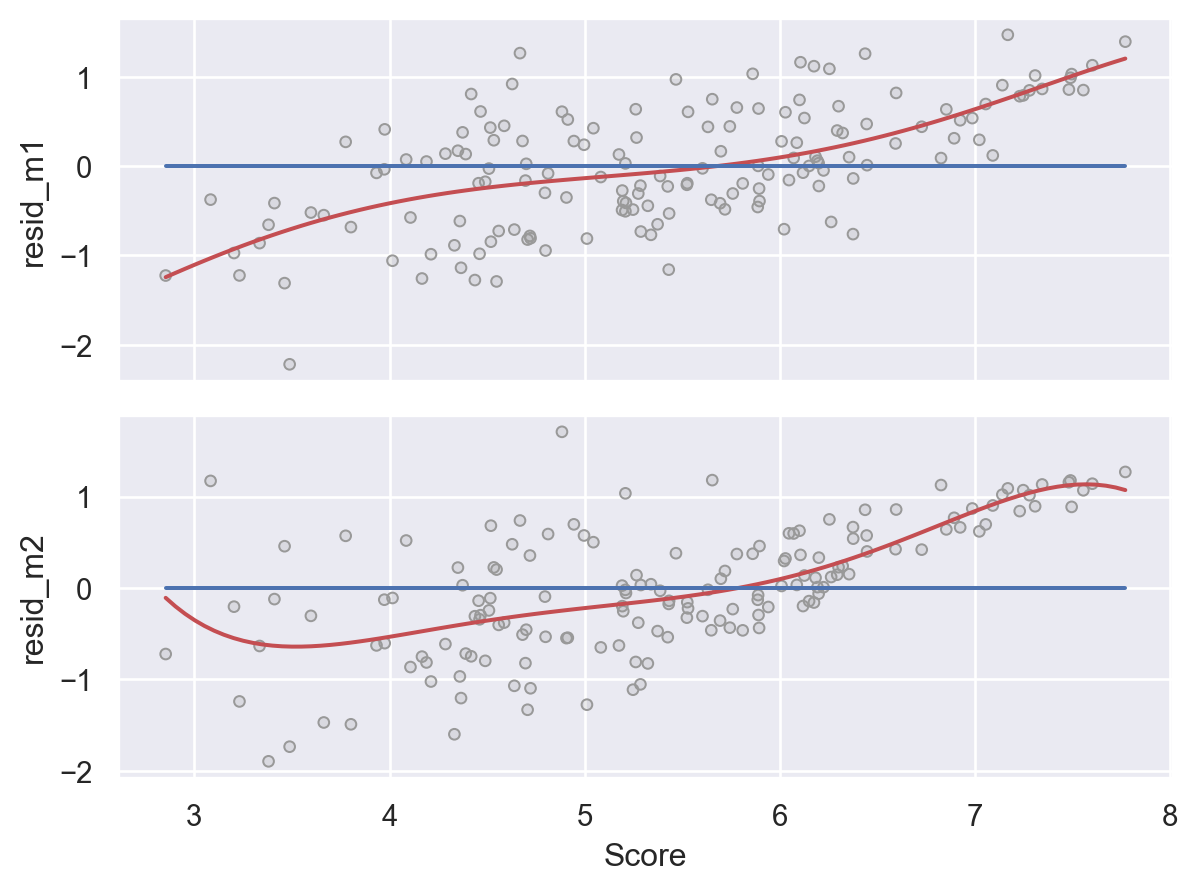

In [410]:
(
    so.Plot(data_pred, x='Score')
    .pair(y=['resid_m1', 'resid_m2'])
    .add(so.Dots(color='.6'))
    .add(so.Line(color='r'), so.PolyFit(5))
    .add(so.Line(color='b'), so.Agg(lambda x: 0))
)

interaction이 있는 모델에서

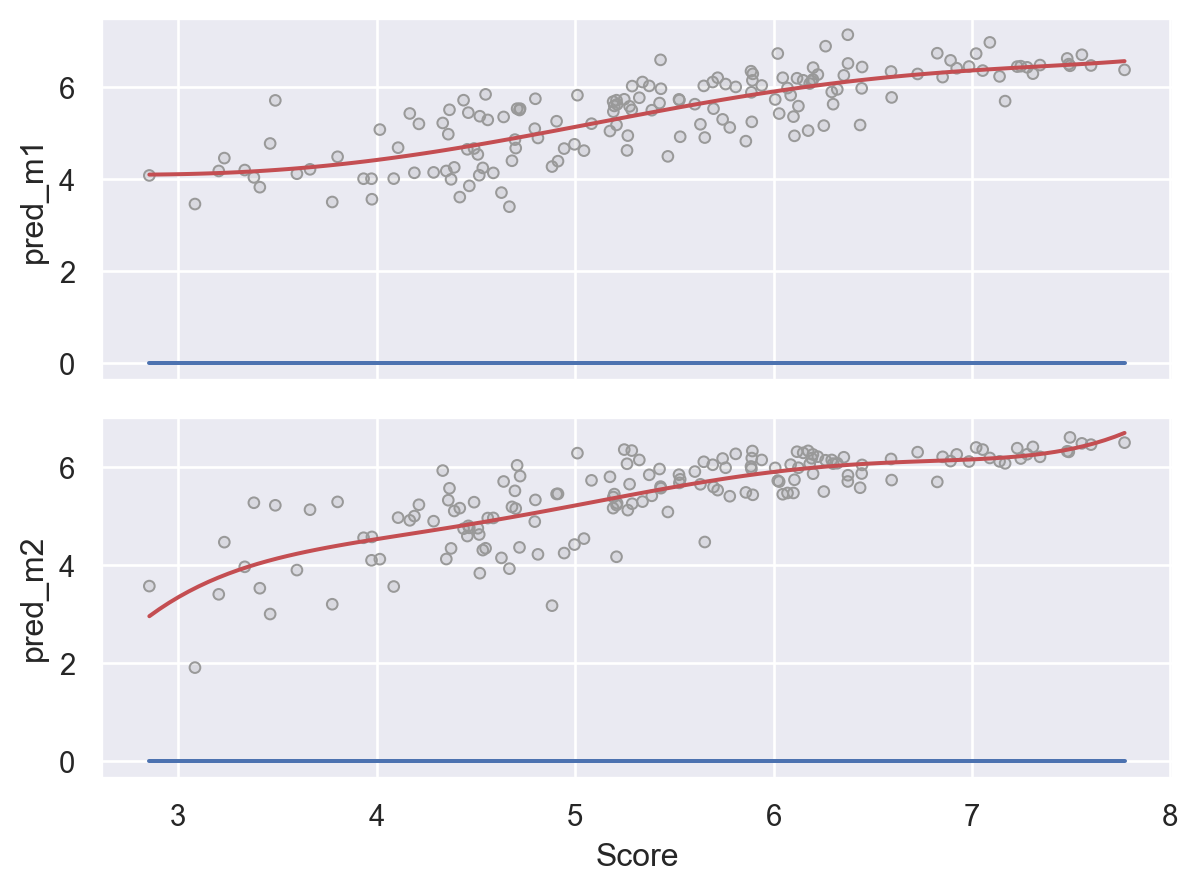

In [411]:
(
    so.Plot(data_pred, x='Score')
    .pair(y=['pred_m1', 'pred_m2'])
    .add(so.Dots(color='.6'))
    .add(so.Line(color='r'), so.PolyFit(5))
    .add(so.Line(color='b'), so.Agg(lambda x: 0))
)

In [412]:
mod_g = ols('Score ~ GDP', data=data).fit()
mod_g_s = ols('Score ~ GDP + support', data=data).fit()
mod_g_s_f = ols('Score ~ GDP + support + freedom', data=data).fit()
mod_interaction = ols('Score ~ GDP * support * freedom', data=data).fit()

print(
    f"gdp: {mod_g.rsquared:.3f}\n",
    f"gdp + support: {mod_g_s.rsquared:.3f}\n",
    f"gdp + support + freedom: {mod_g_s_f.rsquared:.3f}\n",
    f"gdp * support * freedom: {mod_interaction.rsquared: .3f}\n",
)

gdp: 0.630
 gdp + support: 0.704
 gdp + support + freedom: 0.754
 gdp * support * freedom:  0.800



## [Result]
---
예상했던 결과와 비슷하게 국가의 행복지수에는 GDP. SUPPORT, FREEDOM이 모두 관여하는 것을 모델의 파라미터를 하나씩 추가할 때마다 RSQUARED값이 증가하는 것을 통해 확인할 수 있다.
단순히 Add Model보다 Interaction이 있는 Model의 Rsquared값이 약 0.05값 더 높게 측정되는 것 또한 확인할 수 있었다.

### 한 학기 동안 유익한 강의 열정적으로 해주셔서 감사합니다. 대학교 마지막 학년에서 좋은 강의 들어 뿌듯한 수업이었습니다!!! 4학년 중에 수강한 과목이라 중간고사 시즌에 많이 공부를 하지 못해 성적이 좋지 못한 점이 있는데 재수강이 .. 힘들어서 과제로 커버하고자 노력했습니다 잘 부탁드립니다 !!!! 감사합니다 교수님!!!